In [1]:
# 先导入pandas库
import pandas as pd
# 读入数据，假设数据存放在当前目录下的titanic.csv文件中
data = pd.read_csv("Telephone.csv",encoding='gb18030')

In [2]:
#以下两句用于正常显示汉字
#from pylab import mpl   
#mpl.rcParams['font.sans-serif'] = ['Kaiti']

In [3]:
# 显示前10行数据
data.head(10)

,居住地,年龄,婚姻状况,收入,教育水平,性别,家庭人数,开通月数,无线服务,基本费用,免费部分,无线费用,电子支付,套餐类型,流失
0,2,44,1,64,4,0,2,13,0,3.70,0.00,0.0,0,1,1
1,3,33,1,136,5,0,6,11,1,4.40,20.75,35.7,0,4,1
2,3,52,1,116,1,1,2,68,0,18.15,18.00,0.0,0,3,0
3,2,33,0,33,2,1,1,33,0,9.45,0.00,0.0,0,1,1
4,2,30,1,30,1,0,4,23,0,6.30,0.00,0.0,0,3,0
5,2,39,0,78,2,1,1,41,0,11.80,19.25,0.0,0,3,0
6,3,22,1,19,2,1,5,45,0,10.90,0.00,0.0,1,2,1
7,2,35,0,76,2,0,3,38,1,6.05,45.00,64.9,1,4,0
8,3,59,1,166,4,0,5,45,0,9.75,28.50,0.0,0,3,0
9,1,41,1,72,1,0,3,68,0,24.15,0.00,0.0,0,2,0


In [4]:
#显示行和列
data.shape

(1000, 15)

In [5]:
#显示数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   居住地     1000 non-null   int64  
 1   年龄      1000 non-null   int64  
 2   婚姻状况    1000 non-null   int64  
 3   收入      1000 non-null   int64  
 4   教育水平    1000 non-null   int64  
 5   性别      1000 non-null   int64  
 6   家庭人数    1000 non-null   int64  
 7   开通月数    1000 non-null   int64  
 8   无线服务    1000 non-null   int64  
 9   基本费用    1000 non-null   float64
 10  免费部分    1000 non-null   float64
 11  无线费用    1000 non-null   float64
 12  电子支付    1000 non-null   int64  
 13  套餐类型    1000 non-null   int64  
 14  流失      1000 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 117.3 KB


             居住地           年龄         婚姻状况           收入         教育水平  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    41.684000     0.495000    77.535000     2.671000   
std       0.8162    12.558816     0.500225   107.044165     1.222397   
min       1.0000    18.000000     0.000000     9.000000     1.000000   
25%       1.0000    32.000000     0.000000    29.000000     2.000000   
50%       2.0000    40.000000     0.000000    47.000000     3.000000   
75%       3.0000    51.000000     1.000000    83.000000     4.000000   
max       3.0000    77.000000     1.000000  1668.000000     5.000000   

                性别         家庭人数         开通月数         无线服务         基本费用  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.517000     2.331000    35.526000     0.296000    11.723100   
std       0.499961     1.435793    21.359812     0.456719    10.363486   
min       0.000000     1.000000     1.000000     0.0000

<AxesSubplot:>

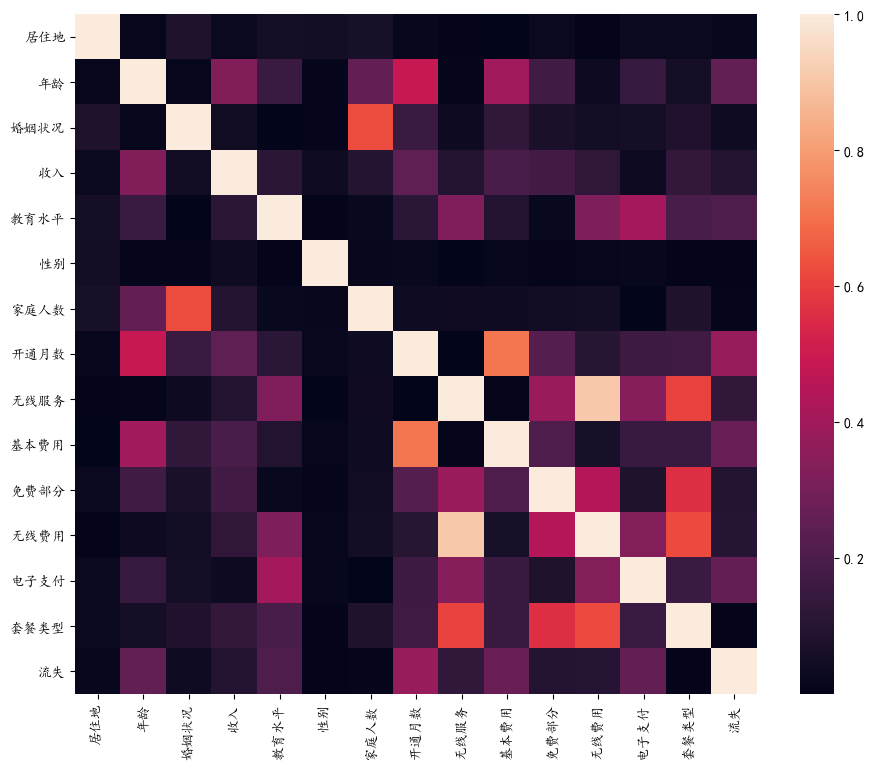

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns  #作图
from pylab import mpl   
mpl.rcParams['font.sans-serif'] = ['Kaiti']
# 显示数值型特征列的描述统计信息
print(data.describe())  

data_corr = data.corr(method='pearson') #生成相关性矩阵
print(data_corr)      #显示相关性矩阵，越接近于0，相关性越弱，绝对值越大，相关性越强（正相关或者负相关），相关性强，则对预测的作用越大
data_corr = data_corr.abs()
plt.figure(figsize=(11, 9),dpi=100)   #生成画布
sns.heatmap(data=data_corr)  #绘制热力图

In [40]:
# 显示类别型特征列的所有取值及出现次数
data.流失.value_counts()  #默认按照数量从多到少的顺序排列

0    726
1    274
Name: 流失, dtype: int64

In [8]:
# 生成X和y
feature_cols = ['居住地','年龄','婚姻状况','收入','教育水平','性别', '家庭人数', '开通月数', '无线服务', '基本费用','免费部分','无线费用','电子支付','套餐类型']  #提取认为对于分类有用的特征列
X = data[feature_cols]
y = data.流失

In [9]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
#bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [16]:
parameters = {'n_estimators':[20, 50, 100],
              'max_samples':[0.2, 0.5, 0.8],
             }
bag_clf = GridSearchCV(BaggingClassifier(), param_grid = parameters, cv = 5, scoring='accuracy')

In [17]:
bag_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_samples': [0.2, 0.5, 0.8],
                         'n_estimators': [20, 50, 100]},
             scoring='accuracy')

In [18]:
print(bag_clf.best_params_)
print(bag_clf.best_score_)

{'max_samples': 0.2, 'n_estimators': 50}
0.7528571428571429


In [19]:
y_pred = bag_clf.predict(X_test)

In [20]:
# 输出对测试数据预测的精度、查准率、查全率和F1分数
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7566666666666667
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       216
           1       0.62      0.33      0.43        84

    accuracy                           0.76       300
   macro avg       0.70      0.63      0.64       300
weighted avg       0.74      0.76      0.73       300



In [21]:
#boosting
from sklearn.ensemble import GradientBoostingClassifier
import warnings

In [22]:
warnings.filterwarnings("ignore")
parameters = {'n_estimators':[20, 50, 100, 200, 300, 400],
              'subsample':[0.2, 0.5, 0.8],
              'max_depth':[1, 2, 3],
              'max_features':[3, 4, 5]}
gbc_clf = GridSearchCV(GradientBoostingClassifier(),param_grid = parameters, cv = 5, scoring='accuracy')

In [23]:
gbc_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'max_features': [3, 4, 5],
                         'n_estimators': [20, 50, 100, 200, 300, 400],
                         'subsample': [0.2, 0.5, 0.8]},
             scoring='accuracy')

In [24]:
print(gbc_clf.best_params_)
print(gbc_clf.best_score_)

{'max_depth': 3, 'max_features': 4, 'n_estimators': 20, 'subsample': 0.5}
0.7714285714285714


In [25]:
y_pred = gbc_clf.predict(X_test)

In [26]:
# 输出对测试数据预测的精度、查准率、查全率和F1分数
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7466666666666667
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       216
           1       0.59      0.31      0.41        84

    accuracy                           0.75       300
   macro avg       0.68      0.61      0.62       300
weighted avg       0.72      0.75      0.72       300



In [27]:
#stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [28]:
#estim_list = ()

In [29]:
st_clf = StackingClassifier(estimators = [('gbc',GradientBoostingClassifier(max_depth=1, max_features=3, n_estimators=20, subsample=0.5)),
                                          ('bag',BaggingClassifier(max_samples=0.3,n_estimators=20))] , 
                            final_estimator = LogisticRegression())
st_clf._estimator_type = "classifier"

In [30]:
st_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_depth=1,
                                                           max_features=3,
                                                           n_estimators=20,
                                                           subsample=0.5)),
                               ('bag',
                                BaggingClassifier(max_samples=0.3,
                                                  n_estimators=20))],
                   final_estimator=LogisticRegression())

In [31]:
y_pred = st_clf.predict(X_test)

In [32]:
# 输出对测试数据预测的精度、查准率、查全率和F1分数
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7666666666666667
              precision    recall  f1-score   support

           0       0.78      0.95      0.85       216
           1       0.69      0.30      0.42        84

    accuracy                           0.77       300
   macro avg       0.74      0.62      0.64       300
weighted avg       0.75      0.77      0.73       300

